In [1]:
import pandas as pd
df = pd.read_csv("/home/zumi/Documents/Kifiya training/Week 0/Resources/data/benin-malanville.csv")  

In [2]:
# Summary stats
df.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,240.559452,167.187516,115.358961,236.589496,228.883576,28.179683,54.487969,2.121113,2.809195,0.473390,153.435172,8.582407,994.197199,0.000923,0.001905,35.246026,32.471736,NaN
std,331.131327,261.710501,158.691074,326.894859,316.536515,5.924297,28.073069,1.603466,2.029120,0.273395,102.332842,6.385864,2.474993,0.030363,0.037115,14.807258,12.348743,NaN
min,-12.900000,-7.800000,-12.600000,0.000000,0.000000,11.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,985.000000,0.000000,0.000000,9.000000,8.100000,NaN
25%,-2.000000,-0.500000,-2.100000,0.000000,0.000000,24.200000,28.800000,1.000000,1.300000,0.400000,59.000000,3.700000,993.000000,0.000000,0.000000,24.200000,23.600000,NaN
50%,1.800000,-0.100000,1.600000,4.500000,4.300000,28.000000,55.100000,1.900000,2.600000,0.500000,181.000000,8.600000,994.000000,0.000000,0.000000,30.000000,28.900000,NaN
75%,483.400000,314.200000,216.300000,463.700000,447.900000,32.300000,80.100000,3.100000,4.100000,0.600000,235.100000,12.300000,996.000000,0.000000,0.000000,46.900000,41.500000,NaN
max,1413.000000,952.300000,759.200000,1342.300000,1342.300000,43.800000,100.000000,19.500000,26.600000,4.200000,360.000000,99.400000,1003.000000,1.000000,2.500000,81.000000,72.500000,NaN


In [3]:
# Missing value report
missing = df.isna().sum()
missing[missing > 0]

Comments    525600
dtype: int64

In [4]:
# Highlight columns with >5% nulls
missing_percent = (df.isna().mean()) * 100
missing_percent[missing_percent > 5]


Comments    100.0
dtype: float64

In [5]:
from scipy.stats import zscore

# Columns to check
cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

# Compute Z-scores
z_scores = df[cols].apply(zscore)

# Flag outliers where |Z| > 3
outliers = (z_scores.abs() > 3)

# View rows with any outlier
df_outliers = df[outliers.any(axis=1)]

# Handle missing values
df_cleaned = df.copy()
df_cleaned[cols] = df_cleaned[cols].fillna(df_cleaned[cols].median())

# Export cleaned data
df_cleaned.to_csv("/home/zumi/Documents/Kifiya training/Week 0/Resources/data/benin_clean.csv", index=False)


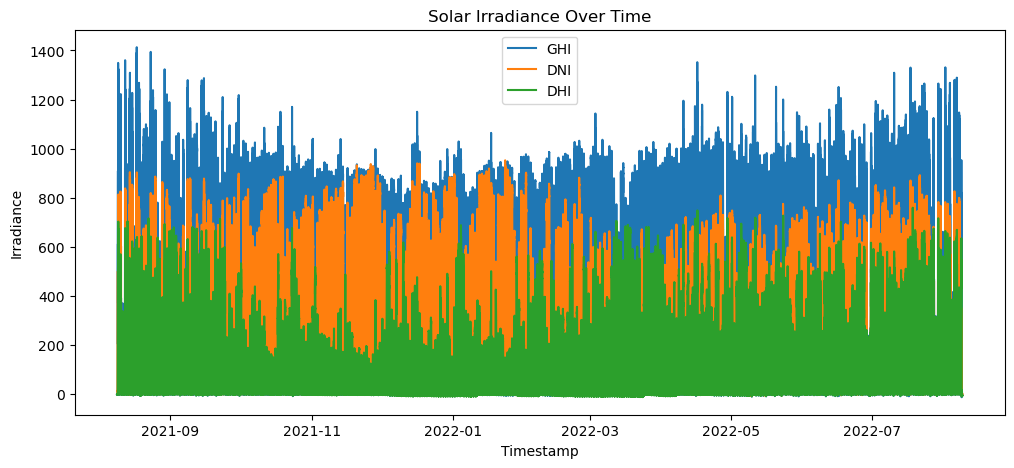

In [6]:
import matplotlib.pyplot as plt

df['Timestamp'] = pd.to_datetime(df['Timestamp'])

plt.figure(figsize=(12, 5))
plt.plot(df['Timestamp'], df['GHI'], label='GHI')
plt.plot(df['Timestamp'], df['DNI'], label='DNI')
plt.plot(df['Timestamp'], df['DHI'], label='DHI')
plt.legend()
plt.title("Solar Irradiance Over Time")
plt.xlabel("Timestamp")
plt.ylabel("Irradiance")
plt.show()

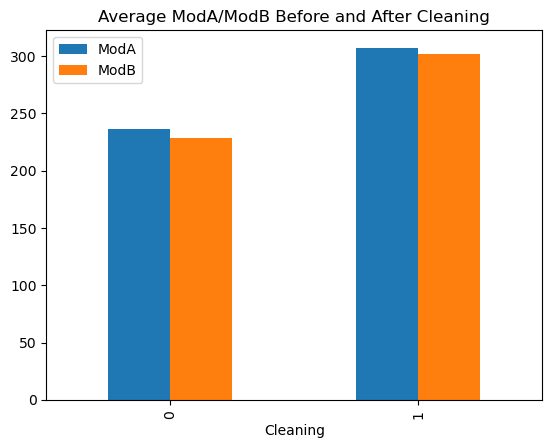

In [7]:
df_cleaned.groupby("Cleaning")[['ModA', 'ModB']].mean().plot(kind='bar')
plt.title("Average ModA/ModB Before and After Cleaning")
plt.show()

<Axes: xlabel='WS', ylabel='GHI'>

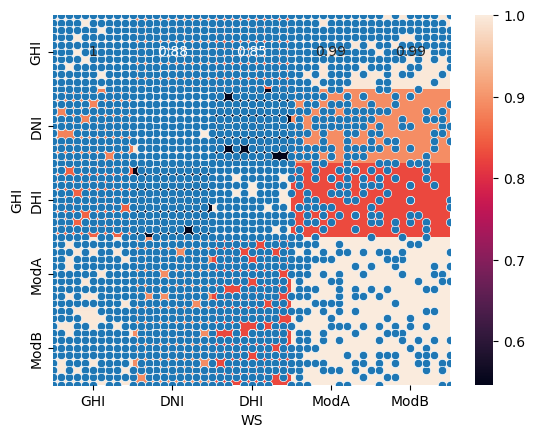

In [8]:
import seaborn as sns

# Heatmap
sns.heatmap(df_cleaned[['GHI', 'DNI', 'DHI', 'ModA', 'ModB']].corr(), annot=True)

# Scatter plots
sns.scatterplot(x='WS', y='GHI', data=df_cleaned)
sns.scatterplot(x='RH', y='Tamb', data=df_cleaned)

<Axes: >

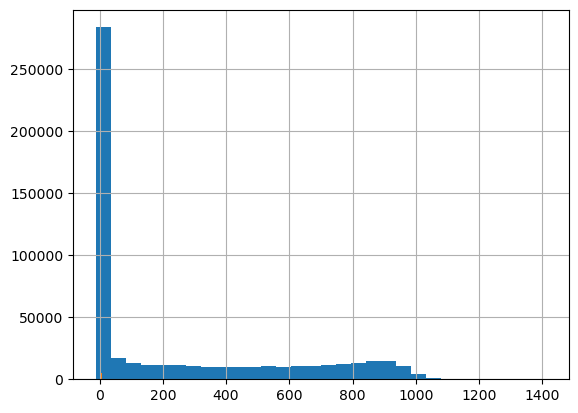

In [9]:
# Histograms
df_cleaned['GHI'].hist(bins=30)
df_cleaned['WS'].hist(bins=30)

<Axes: xlabel='RH', ylabel='Tamb'>

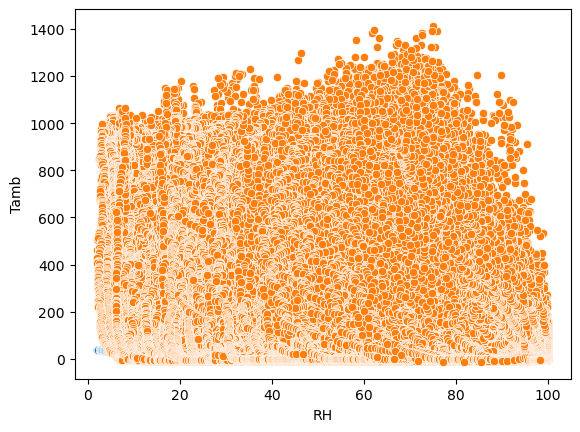

In [10]:
sns.scatterplot(x='RH', y='Tamb', data=df_cleaned)
sns.scatterplot(x='RH', y='GHI', data=df_cleaned)

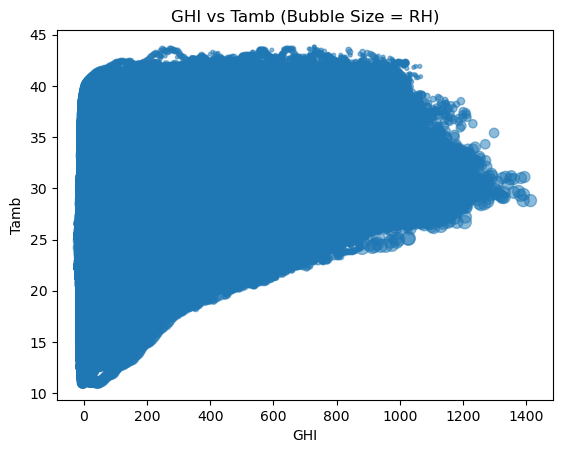

In [11]:
plt.scatter(df_cleaned['GHI'], df_cleaned['Tamb'], s=df_cleaned['RH'], alpha=0.5)
plt.xlabel('GHI')
plt.ylabel('Tamb')
plt.title('GHI vs Tamb (Bubble Size = RH)')
plt.show()